
# Working with HTML, JSON, Web Scraping, and Web APIs 

**Group members** :
- Volkan UZUNDAG
- Rungradith MINGPATUMKIJ
- Marwan KANAAN

# Part 1: Working with HTML and JSON 

For this part, we select three of interesting books on Healthcare and Big data subjects. Each one of the books will show the title, authors, edition and and publication date. We will take the information from the selected books, and create two files, one of which stores the books’ information in HTML (using an html table) and the other of which stores the books’ information in JSON format (e.g.  “books.html” and “books.json”).

## 1. Creating two files, one of which stores the books’ information in HTML and in JSON format 

Three books of this project's subjects
1. Big Data and Health Analytics
2. Healthcare Data Analytics (Chapman & Hall/CRC Data Mining and Knowledge Discovery Series Book 36)
3. Data and Text Processing for Health and Life Sciences (Advances in Experimental Medicine and Biology Book 1137)

 ### Creating the books’ information in "books.html" file by using an html table  [1]

<!DOCTYPE html>
<html>
<head>
    <title>The Books in HTML file</title>
<style>
        table, th, td {
            border:1px solid black;
            width:auto;
        }
        th, td {
            padding: 5px;
        }
    </style>
</head>
<body>  
    
<table>      
        <tr>
          <th>Title</th>
          <th>Author(s)</th>
          <th>Edition</th>
          <th>Publication Date</th>
        </tr>
        <tr>
          <td>Big Data and Health Analytics</td>
          <td>Katherine Marconi, Harold Lehmann</td>
          <td>1st</td>
          <td>December 20, 2014</td>
        </tr>
        <tr>
            <td>Healthcare Data Analytics (Chapman & Hall/CRC Data Mining and Knowledge Discovery Series Book 36)</td>
            <td>Charu C. Aggarwal, Chandan K. Reddy</td>
            <td>1st</td>
            <td>June 23, 2015</td>
          </tr>
          <tr>
            <td>Data and Text Processing for Health and Life Sciences (Advances in Experimental Medicine and Biology Book 1137)</td>
            <td>Francisco M. Couto</td>
            <td>1st ed. 2019</td>
            <td>June 10, 2019</td>
          </tr>
      </table>
</body>
</html>

### Creating the books’ information in "books.json" file [2]

[
    {
        "Title": "Big Data and Health Analytics",
        "Author(s)": "Katherine Marconi, Harold Lehmann",
        "Edition": "1st",
        "Publication Date": "December 20, 2014"
    },
    {
        "Title": "Healthcare Data Analytics (Chapman & Hall/CRC Data Mining and Knowledge Discovery Series Book 36)",
        "Author(s)": "Charu C. Aggarwal, Chandan K. Reddy",
        "Edition": "1st",
        "Publication Date": "June 23, 2015"
    },
    {
        "Title": "Data and Text Processing for Health and Life Sciences (Advances in Experimental Medicine and Biology Book 1137)",
        "Author(s)": "Francisco M. Couto",
        "Edition": "1st ed. 2019",
        "Publication Date": "June 10, 2019"
    }
  ]


## 2. READING HTML AND JSON FILES INTO PANDAS DATA FRAMES

In [1]:

# imports the pandas library

import pandas as pd

In [2]:
pd.set_option('display.expand_frame_repr', False)       #[3]
pd.set_option('max_colwidth', None)

The __set_options()__ are used to set the behavior of the __DataFrame display__ and how the information is rendered.

### Loading HTML information into  Pandas DataFrame

In [3]:
# Using  __read_html()__ to read the HTML into a DataFrame    [4]

df_html = pd.read_html('https://raw.githubusercontent.com/PeckDJ/DAV5400_GroupProject2_/main/books.HTML')
failures = df_html[0]
failures

,Title,Author(s),Edition,Publication Date
0,Big Data and Health Analytics,"Katherine Marconi, Harold Lehmann",1st,"December 20, 2014"
1,Healthcare Data Analytics (Chapman & Hall/CRC Data Mining and Knowledge Discovery Series Book 36),"Charu C. Aggarwal, Chandan K. Reddy",1st,"June 23, 2015"
2,Data and Text Processing for Health and Life Sciences (Advances in Experimental Medicine and Biology Book 1137),Francisco M. Couto,1st ed. 2019,"June 10, 2019"


### Loading JSON information into Pandas DataFrame


In [4]:
#Using 'read_json' function to read the books.json file into a DataFrame

df_json = pd.read_json('https://raw.githubusercontent.com/PeckDJ/DAV5400_GroupProject2_/main/books.json')
df_json

,Title,Author(s),Edition,Publication Date
0,Big Data and Health Analytics,"Katherine Marconi, Harold Lehmann",1st,"December 20, 2014"
1,Healthcare Data Analytics (Chapman & Hall/CRC Data Mining and Knowledge Discovery Series Book 36),"Charu C. Aggarwal, Chandan K. Reddy",1st,"June 23, 2015"
2,Data and Text Processing for Health and Life Sciences (Advances in Experimental Medicine and Biology Book 1137),Francisco M. Couto,1st ed. 2019,"June 10, 2019"


*Analysis:* <br> It seems like **both dataframes are the same** even though they have been loaded from two different file types.

#### Reference 
1. https://www.quackit.com/html/html_editors/scratchpad/?example=/html/html_table_tutorial
2. https://docs.python.org/3/library/json.html#module-json.tool
3. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html 
4. https://pandas.pydata.org/docs/reference/api/pandas.read_html.html 

# Part 2: Scraping Katz School Staff Information

In this section we will extract information about Katz School's staff in a pandas data frame. For this tas, we will use Python's requests, BeautifulSoup, Regex and Pandas libraries. We will first get the relevant data from the website using requests library and store tha data as a BeautifulSoup object. Then we will extract the relevant data using regex and string methods.

In [5]:
# importing libraries

import requests
import bs4
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [6]:
# getting the website data with requests get method

file = requests.get("https://www.yu.edu/katz/staff")
file

<Response [200]>

In [7]:
# storing the data as a bs object

staff = bs(file.content, "html.parser")
staff


<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
<!-- End Google Tag Manager -->
<!-- Start People Grove Cards -->
<script async="" src="https://cdn.peoplegrove.com/pg-widgets/pg-elements-e

In [8]:
# Finding only the relavant part in the data we extracted from the website
# First detect the relevant part on the website using inpect option
# choose the appropriate CSS class
# bs.find method gives us the selected part

staff_info = staff.find(class_="field field--name-field-paragraph-body")

staff_info

<div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
<p>Paul Russo, Vice Provost and Dean <br/>
<a href="/faculty/pages/russo-paul">Read Dr. Russo's full biography</a> </p>
<p>Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean <br/>
<a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
 <br/>
Sofia Binioris, Senior Project Manager and Advisor to the Dean <br/>
<a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>  </p>
<p>Jackie Hamilton, Director of Global Engagement and New Business Development<br/>
<a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
<p>Tabitha Collazo, Business and Operations Coordinator<br/>
<a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>
<h3>Graduate Admissions</h3>
<p>Jared Hakimi, Director<br/>
<a href="mailto:jared.hakimi@yu.edu">jared.hakimi@yu.edu</a> | 646-592-4722 | <a href="https://go.yu.edu/meetings/ja



Since the website is not well-structured (for ex, h3 tags do not contain p tags, or one of the p tags contains the information of more than one person), our method for extracting the cleaning the data will heavily depend on regex and string methods.


### Extracting and cleaning email and phone data

In [9]:
# use for loop to extract data in each element
# create an empty list, then apply bs.find_all() method to get al p tags
# then get_text() method to turn the data into string
# str.split() method for seperating the elements by ,
# adding the text into new list

alist = []

for i in staff_info.find_all('p'):
    x = i.get_text(separator="\n")
    x.split(",")
    alist.append(x)
alist


# use regex_findall() method to extract email and phone data and store then in lists using for loop

m = []
p = []
for a in alist:
    m.append(re.findall('\S+@\S+', a))
    p.append(re.findall('\d{3}-\d{3}-\d{4}', a))
p
m

[[],
 ['aaron.ross2@yu.edu', 'sofia.binioris@yu.edu'],
 ['jackie.hamilton@yu.edu'],
 ['tabitha.collazo@yu.edu'],
 ['jared.hakimi@yu.edu'],
 ['shayna.matzner@yu.edu'],
 ['xavier.velasquez@yu.edu'],
 ['rafael.reyes@yu.edu'],
 ['shari.lowsky@yu.edu'],
 ['simon.jaffe@yu.edu'],
 ['gladys.davis@yu.edu'],
 ['nebahat.bayrakcioglu@yu.edu'],
 ['john.vivolo@yu.edu'],
 ['lloyd.carew-reid@yu.edu'],
 ['denton.field@yu.edu']]



One of the elements in the email list contains two email address because of the order of the html document. This situation will cause also problems for the data extraction of other attributes. We will skip the data of that staff and add it at the end. 



In [10]:
# cleaning the mail list by removing the secind emails in an element
# assign 'NA' to those without email address
# store the result in a list

mail = []

for i in m:
    if len(i) > 1:
        i.pop(1)
    if i == []:
        i.append("NA")
    else:
        i = i
    mail.append(i)
mail

[['NA'],
 ['aaron.ross2@yu.edu'],
 ['jackie.hamilton@yu.edu'],
 ['tabitha.collazo@yu.edu'],
 ['jared.hakimi@yu.edu'],
 ['shayna.matzner@yu.edu'],
 ['xavier.velasquez@yu.edu'],
 ['rafael.reyes@yu.edu'],
 ['shari.lowsky@yu.edu'],
 ['simon.jaffe@yu.edu'],
 ['gladys.davis@yu.edu'],
 ['nebahat.bayrakcioglu@yu.edu'],
 ['john.vivolo@yu.edu'],
 ['lloyd.carew-reid@yu.edu'],
 ['denton.field@yu.edu']]

In [11]:
# removing the nested list by assign each element into a new list

mail2 = []

for i in mail:
    for x in i:
        mail2.append(x)
mail2

['NA',
 'aaron.ross2@yu.edu',
 'jackie.hamilton@yu.edu',
 'tabitha.collazo@yu.edu',
 'jared.hakimi@yu.edu',
 'shayna.matzner@yu.edu',
 'xavier.velasquez@yu.edu',
 'rafael.reyes@yu.edu',
 'shari.lowsky@yu.edu',
 'simon.jaffe@yu.edu',
 'gladys.davis@yu.edu',
 'nebahat.bayrakcioglu@yu.edu',
 'john.vivolo@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

In [12]:
# cleaning the phone list
# assigning 'NA' to those without a values

phone = []
for i in p:
    if i == []:
        i.append("NA")
    else:
        i = i
    phone.append(i)
phone

[['NA'],
 ['646-592-4148'],
 ['646-787-6194'],
 ['646-592-4735'],
 ['646-592-4722'],
 ['646-592-4726'],
 ['646-592-4737'],
 ['646-592-4729'],
 ['646-592-4311'],
 ['646-592-4717'],
 ['646-592-4762'],
 ['646-592-4034'],
 ['646-592-4743'],
 ['646-592-4768'],
 ['NA']]

In [13]:
# removing the nested list and adding the elements into a new list

phone2 = []

for i in phone:
    for x in i:
        phone2.append(x)
phone2

['NA',
 '646-592-4148',
 '646-787-6194',
 '646-592-4735',
 '646-592-4722',
 '646-592-4726',
 '646-592-4737',
 '646-592-4729',
 '646-592-4311',
 '646-592-4717',
 '646-592-4762',
 '646-592-4034',
 '646-592-4743',
 '646-592-4768',
 'NA']

### Extracting Name and Title Info

The first lines of p tags include name and title information of Katz personnel. We will clean and extract that information.

In [14]:
# Create empty lists for appending
# remove the useless characters using re.sub() method and splitting the text
# the first elements give the name and the second elements give the title

name = []
title = []

alist1 = []

for i in alist:
    i = re.sub(r"\xa0\n\n\n|\xa0|\n I|\n\xa0|\n\n\n|\n\n|\n |\xa0|\n", ", ", i)
    i = i.split(", ")
    alist1.append(i)
    name.append(i[0])
    title.append(i[1])
    
     

In [15]:
name

['Paul Russo',
 'Aaron Ross',
 'Jackie Hamilton',
 'Tabitha Collazo',
 'Jared Hakimi',
 'Shayna Matzner',
 'Xavier Velasquez',
 'Rafael Reyes',
 'Shari Lowsky',
 'Simon Jaffe',
 'Gladys Davis',
 'Nebahat Bayrakcioglu',
 'John Vivolo',
 'Lloyd Carew-Reid,',
 'Denton Field']

In [16]:
title

['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program Manager',
 'Academic Program Coordinator',
 'Academic Program Coordinator',
 'Academic Program Coordinator',
 'Director of Online and Campus Learning Strategies',
 'Instructional Designer',
 'Educational Technologist']

Since there are continuing parts in the title information i.e. department information, we should apply a different method for title. We will get what is after commas in the first rows and then clean it using regex and string methods.

In [17]:
# select the words after the first commas using regex.findall() method
# storing it in a variable

t = re.compile(',.+\\n').findall(str(staff_info))
t

[', Vice Provost and Dean\xa0<br/>\n',
 ', Director of Strategic Initiatives and Deputy to the Dean\xa0<br/>\n',
 ', Senior Project Manager and Advisor to the Dean\xa0<br/>\n',
 ', Director of Global Engagement and New Business Development<br/>\n',
 ', Business and Operations Coordinator<br/>\n',
 ', Director<br/>\n',
 ', Assistant Director<br/>\n',
 ', Assistant Director<br/>\n',
 ', Director of Graduate Student Life and Community Engagement<br/>\n',
 ', Academic Program Manager, STEM<br/>\n',
 ', Academic Program Coordinator, Speech-Language Pathology<br/>\n',
 ', Academic Program Coordinator, Occupational Therapy<br/>\n',
 ', Academic Program Coordinator, Physician Assistant Studies<br/>\n',
 ', Director of Online and Campus Learning Strategies<br/>\n',
 ',\xa0Instructional Designer<br/>\n',
 ', Educational Technologist<br/>\n']

In [18]:
# create an empty list 
# loope over t list
# remove useless character using regex.sub() method
# append the clean version the words

title1 = []

for i in t:
    i = re.sub(r", |,|<br/>\n|<br/>\n|\xa0", "", i)
    title1.append(i)
title1

['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Senior Project Manager and Advisor to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program ManagerSTEM',
 'Academic Program CoordinatorSpeech-Language Pathology',
 'Academic Program CoordinatorOccupational Therapy',
 'Academic Program CoordinatorPhysician Assistant Studies',
 'Director of Online and Campus Learning Strategies',
 'Instructional Designer',
 'Educational Technologist']

In [19]:
# Since we will add Sofia Binioris's data at the end, drop her title info from the list

title1.pop(2)

'Senior Project Manager and Advisor to the Dean'

In [20]:
# check the title info

title1

['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program ManagerSTEM',
 'Academic Program CoordinatorSpeech-Language Pathology',
 'Academic Program CoordinatorOccupational Therapy',
 'Academic Program CoordinatorPhysician Assistant Studies',
 'Director of Online and Campus Learning Strategies',
 'Instructional Designer',
 'Educational Technologist']

## Staff Data Frame

Finally we will save all the data in pandas data frame. We will first create a dictionary storing the lists we created, then turn it into pandas data frame. After creating the first version of data frame, we will add Office information eventually

In [21]:
#create dictionary to store the data in the lists

staff_dict = {'name' : name, 'title' : title1, 'email' : mail2, 'phone' : phone2}


# turn dictionary to dataframe

staff_df = pd.DataFrame(staff_dict)

In [22]:
# check the data frame

staff_df

,name,title,email,phone
0,Paul Russo,Vice Provost and Dean,NA,NA
1,Aaron Ross,Director of Strategic Initiatives and Deputy to the Dean,aaron.ross2@yu.edu,646-592-4148
2,Jackie Hamilton,Director of Global Engagement and New Business Development,jackie.hamilton@yu.edu,646-787-6194
3,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
4,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722
5,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726
6,Xavier Velasquez,Assistant Director,xavier.velasquez@yu.edu,646-592-4737
7,Rafael Reyes,Director of Graduate Student Life and Community Engagement,rafael.reyes@yu.edu,646-592-4729
8,Shari Lowsky,Academic Program ManagerSTEM,shari.lowsky@yu.edu,646-592-4311
9,Simon Jaffe,Academic Program CoordinatorSpeech-Language Pathology,simon.jaffe@yu.edu,646-592-4717


Since the data is not well structure, we need some further code to assign office name to the staff info. To do that we will first find out indexes of all h3 tags, then create a list containing the office names according to number of items in between h3 tags.




In [23]:
# getting all h3 and p tags

hp = staff_info.find_all(['h3', 'p'])
hp

[<h3>Office of the Dean </h3>,
 <p>Paul Russo, Vice Provost and Dean <br/>
 <a href="/faculty/pages/russo-paul">Read Dr. Russo's full biography</a> </p>,
 <p>Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean <br/>
 <a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Senior Project Manager and Advisor to the Dean <br/>
 <a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>  </p>,
 <p>Jackie Hamilton, Director of Global Engagement and New Business Development<br/>
 <a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>,
 <p>Tabitha Collazo, Business and Operations Coordinator<br/>
 <a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>,
 <h3>Graduate Admissions</h3>,
 <p>Jared Hakimi, Director<br/>
 <a href="mailto:jared.hakimi@yu.edu">jared.hakimi@yu.edu</a> | 646-592-4722 | <a href="https://go.yu.edu/meetings/jared-hakimi?_ga=2.135529905.1027

In [24]:
# list containing indexes of h3 tags, which include office information

idx = [i for i, item in enumerate(hp) if re.search(r"<h3>.", str(item))]
idx

[0, 5, 9, 11, 16]

In [25]:
# getting the office names from bs object

off1 = staff_info.find_all('h3')
off1

[<h3>Office of the Dean </h3>,
 <h3>Graduate Admissions</h3>,
 <h3>Graduate Student Life</h3>,
 <h3>Academic Programs</h3>,
 <h3>Teaching and Learning </h3>]

In [26]:
# cleaning the office data and storing it in a list

off2 = []

for i in off1:
    i = str(i)
    i = re.sub(r'<h3>|</h3>|\xa0', '', i)
    off2.append(i)
off2

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Programs',
 'Teaching and Learning']

In [27]:
# assigning the elements in off2 list to new office list according to the number of elements in between 

aa = [off2[0]]
bb = [off2[1]]
cc = [off2[2]]
dd = [off2[3]]
ee = [off2[4]]

office = [(aa * (idx[1] - idx[0] - 1)), (bb * (idx[2] - idx[1] - 1)), (cc * (idx[3] - idx[2] - 1)), (dd * (idx[4] - idx[3] - 1)), (ee * (len(hp) - idx[4] - 1))]
office

[['Office of the Dean',
  'Office of the Dean',
  'Office of the Dean',
  'Office of the Dean'],
 ['Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions'],
 ['Graduate Student Life'],
 ['Academic Programs',
  'Academic Programs',
  'Academic Programs',
  'Academic Programs'],
 ['Teaching and Learning', 'Teaching and Learning', 'Teaching and Learning']]

In [28]:
# removing the nested list, storing it in a new list

office2 = []

for i in office:
    for a in i:
        office2.append(a)
        
office2

['Office of the Dean',
 'Office of the Dean',
 'Office of the Dean',
 'Office of the Dean',
 'Graduate Admissions',
 'Graduate Admissions',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Programs',
 'Academic Programs',
 'Academic Programs',
 'Academic Programs',
 'Teaching and Learning',
 'Teaching and Learning',
 'Teaching and Learning']

In [29]:
# updating staff dictionary

staff_dict = {'name' : name, 'office' : office2, 'title' : title1, 'email' : mail2, 'phone' : phone2}

In [30]:
# updating the dataframe

staff_df = pd.DataFrame(staff_dict)
staff_df

,name,office,title,email,phone
0,Paul Russo,Office of the Dean,Vice Provost and Dean,NA,NA
1,Aaron Ross,Office of the Dean,Director of Strategic Initiatives and Deputy to the Dean,aaron.ross2@yu.edu,646-592-4148
2,Jackie Hamilton,Office of the Dean,Director of Global Engagement and New Business Development,jackie.hamilton@yu.edu,646-787-6194
3,Tabitha Collazo,Office of the Dean,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
4,Jared Hakimi,Graduate Admissions,Director,jared.hakimi@yu.edu,646-592-4722
5,Shayna Matzner,Graduate Admissions,Assistant Director,shayna.matzner@yu.edu,646-592-4726
6,Xavier Velasquez,Graduate Admissions,Assistant Director,xavier.velasquez@yu.edu,646-592-4737
7,Rafael Reyes,Graduate Student Life,Director of Graduate Student Life and Community Engagement,rafael.reyes@yu.edu,646-592-4729
8,Shari Lowsky,Academic Programs,Academic Program ManagerSTEM,shari.lowsky@yu.edu,646-592-4311
9,Simon Jaffe,Academic Programs,Academic Program CoordinatorSpeech-Language Pathology,simon.jaffe@yu.edu,646-592-4717


In [31]:
# adding Sofia Binioris manually in pandas series

sofia = {'name' : 'Sofia Binioris', 
         'office' : 'Office of the Dean',
         'title' : 'Senior Project Manager and Advisor to the Dean', 
         'email' : 'sofia.binioris@yu.edu',
        'phone' : 'NA'}

sof = pd.Series(sofia)

In [32]:
sof

name                                      Sofia Binioris
office                                Office of the Dean
title     Senior Project Manager and Advisor to the Dean
email                              sofia.binioris@yu.edu
phone                                                 NA
dtype: object

In [33]:
# final version of the Staff information data frame

staff_df.append(sofia, ignore_index = True)

C:\Users\volka\AppData\Local\Temp\ipykernel_22496\324146017.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  staff_df.append(sofia, ignore_index = True)


,name,office,title,email,phone
0,Paul Russo,Office of the Dean,Vice Provost and Dean,NA,NA
1,Aaron Ross,Office of the Dean,Director of Strategic Initiatives and Deputy to the Dean,aaron.ross2@yu.edu,646-592-4148
2,Jackie Hamilton,Office of the Dean,Director of Global Engagement and New Business Development,jackie.hamilton@yu.edu,646-787-6194
3,Tabitha Collazo,Office of the Dean,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
4,Jared Hakimi,Graduate Admissions,Director,jared.hakimi@yu.edu,646-592-4722
5,Shayna Matzner,Graduate Admissions,Assistant Director,shayna.matzner@yu.edu,646-592-4726
6,Xavier Velasquez,Graduate Admissions,Assistant Director,xavier.velasquez@yu.edu,646-592-4737
7,Rafael Reyes,Graduate Student Life,Director of Graduate Student Life and Community Engagement,rafael.reyes@yu.edu,646-592-4729
8,Shari Lowsky,Academic Programs,Academic Program ManagerSTEM,shari.lowsky@yu.edu,646-592-4311
9,Simon Jaffe,Academic Programs,Academic Program CoordinatorSpeech-Language Pathology,simon.jaffe@yu.edu,646-592-4717



# Part 3: Working with Web API's

We created an account on the NY Times Developers website that gave us access to the Books API. It allows us to get NYT Best Sellers Lists and lookup book reviews. <br>
We call our app: **books_app**, with a generated app ID. <br>
We now have an authenticated API key to access the Books API that is made of: <br>
- A Key: *6cqwpT8GofhAHyDDGPg85zjCKjeWbApn*
- A Secret

We start by importing the **relevant libraries** for our analysis as well as the NYT API URL that was given to us, edited with our individual **key**:

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
url = 'https://api.nytimes.com/svc/books/v3/lists/full-overview.json?api-key=6cqwpT8GofhAHyDDGPg85zjCKjeWbApn'
resp = requests.get(url) #Calling the API to get the data from the NY Times website
resp

<Response [200]>

In [35]:
data = resp.json() #Then we convert the object into a JSON format
type(data)

dict

The data is now in a dictionnary format.

In [36]:
len(data)

4

*Analysis:* <br>We know that there are more than 4 books in the data set. It means that the books' data is probably concentrated in one or many sub dictionnaries. <br>Now, let's take a look at the variable:

In [37]:
data

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 230,
 'results': {'bestsellers_date': '2022-10-22',
  'published_date': '2022-11-06',
  'published_date_description': 'latest',
  'previous_published_date': '2022-10-30',
  'next_published_date': '',
  'lists': [{'list_id': 704,
    'list_name': 'Combined Print and E-Book Fiction',
    'list_name_encoded': 'combined-print-and-e-book-fiction',
    'display_name': 'Combined Print & E-Book Fiction',
    'updated': 'WEEKLY',
    'list_image': None,
    'list_image_width': None,
    'list_image_height': None,
    'books': [{'age_group': '',
      'amazon_product_url': 'https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20',
      'article_chapter_link': '',
      'author': 'Colleen Hoover',
      'book_image': 'https://storage.googleapis.com/du-prd/books/images/9781668001226.jpg',
      'book_image_width': 322,
      'book_image_height': 500,
      'book_review_link': '',
  

*Analysis:* <br> Indeed, as we can see here, there are **sub dictionnaries** that contain keys and values that we will need to access to.

Now let's try to extract relevant data in the dictionnaries to put it in a dataframe:
- The title of the book
- The author of the book
- The date of publication of the book
- The description of the book
- The publisher of the books
- For how many weeks the book is on the NY Times best sellers list
- The current rank of the book on the NY Times best sellers list
- Last week's rank of the book on the NY Times best sellers list

In [38]:
#We convert as a dataframe the sub dictionnary called 'lists' in the 'results' key.
books = pd.DataFrame(data['results']['lists'])
books

list_id                             list_name                     list_name_encoded                        display_name  updated list_image list_image_width list_image_height                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

*Analysis:* <br> Most of the information are still hidden in a sub-sub dictionnary through the 'books' key within the 'lists' sub dict. Let's take a closer look:

In [39]:
books2 = pd.DataFrame(books['books'])
books2

books
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [{'age_group': '', 'amazon_product_url': 'https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20', 'article_chapter_link': '', 'author': 'Colleen Hoover', 'book_image': 'https://storage.googleapis.com/du-prd/books/images/9781668001226.jpg', 'book_image_width': 322, 'book_image_height': 500, 'book_review_link': '', 'book_uri': 'nyt://book/3aa85e47-4df9-53ef-9957-a77753d3502c', 'contributor': 'by Colleen Hoover', 'contributor_note': '', 'created_date': '2022-10-26 22:06:26', 'description': 'In the sequel to “It Ends With Us,” Lily deals with her jealous ex-husband as she reconnects with her first boyfriend.', 'first_chapter_link': '', 'price': '0.00', 'primary_isbn10': '1668001225', 'primary_isbn13': '9781668001226', 'publisher': 'Atria', 'rank': 1, 'rank_last_week': 0, 'sunday_review_link': '', 'title': 'IT STARTS WITH US', 'updated_date': '2022-10-26 22:10:41', 'weeks_on_list': 1, 'buy_links': [{'name': 'Amazon', 'url': 'https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20'}, {'name': 'Apple Books', 'url': 'https://goto.applebooks.apple/9781668001226?at=10lIEQ'}, {'name': 'Barnes and Noble', 'url': 'https://www.anrdoezrs.net/click-7990613-11819508?url=https%3A%2F%2Fwww.barnesandnoble.com%2Fw%2F%3Fean%3D9781668001226'}, {'name': 'Books-A-Million', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fp%252FIT%252BSTARTS%252BWITH%252BUS%252FColleen%252BHoover%252F9781668001226&url2=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fsearch%253Fquery%253DIT%252BSTARTS%252BWITH%252BUS%252BColleen%252BHoover'}, {'name': 'Bookshop', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fbookshop.org%2Fa%2F3546%2F9781668001226&url2=https%3A%2F%2Fbookshop.org%2Fbooks%3Faffiliate%3D3546%26keywords%3DIT%2BSTARTS%2BWITH%2BUS'}, {'name': 'IndieBound', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.indiebound.org%2Fbook%2F9781668001226%3Faff%3DNYT&url2=https%3A%2F%2Fwww.indiebound.org%2Fsearch%2Fbook%3Fkeys%3DIT%2BSTARTS%2BWITH%2BUS%2BColleen%2BHoover%26aff%3DNYT'}]}, {'age_group': '', 'amazon_product_url': 'https://www.amazon.com/d

*Analysis:* <br> The sub-sub dictionnary is not converting into a proper dataframe, that is probably because **it is not an actual dictionnary**, let's test its type:

In [40]:
type(books['books'])

pandas.core.series.Series

*Analysis:* <br> Indeed, the books2 variable is actually a **Pandas Series**. <br>
We then need to convert the Series into a dictionnary before turning it into a DataFrame:

In [41]:
books3 = pd.Series.to_dict(books['books']) #Conversion of the Series into a dictionnary
books3

{0: [{'age_group': '',
   'amazon_product_url': 'https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20',
   'article_chapter_link': '',
   'author': 'Colleen Hoover',
   'book_image': 'https://storage.googleapis.com/du-prd/books/images/9781668001226.jpg',
   'book_image_width': 322,
   'book_image_height': 500,
   'book_review_link': '',
   'book_uri': 'nyt://book/3aa85e47-4df9-53ef-9957-a77753d3502c',
   'contributor': 'by Colleen Hoover',
   'contributor_note': '',
   'created_date': '2022-10-26 22:06:26',
   'description': 'In the sequel to “It Ends With Us,” Lily deals with her jealous ex-husband as she reconnects with her first boyfriend.',
   'first_chapter_link': '',
   'price': '0.00',
   'primary_isbn10': '1668001225',
   'primary_isbn13': '9781668001226',
   'publisher': 'Atria',
   'rank': 1,
   'rank_last_week': 0,
   'sunday_review_link': '',
   'title': 'IT STARTS WITH US',
   'updated_date': '2022-10-26 22:10:41',
   'weeks_on_list': 1,
   'buy_links': [{'name': 'Amazon',

In [42]:
books4 = pd.DataFrame(books3[0]) #We turn into a dataframe the value of the first and only key of the dictionnary
books4

,age_group,amazon_product_url,article_chapter_link,author,book_image,book_image_width,book_image_height,book_review_link,book_uri,contributor,...,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,updated_date,weeks_on_list,buy_links
0,,https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/images/9781668001226.jpg,322,500,,nyt://book/3aa85e47-4df9-53ef-9957-a77753d3502c,by Colleen Hoover,...,1668001225,9781668001226,Atria,1,0,,IT STARTS WITH US,2022-10-26 22:10:41,1,"[{'name': 'Amazon', 'url': 'https://www.amazon.com/dp/1668001225?tag=NYTBSREV-20'}, {'name': 'Apple Books', 'url': 'https://goto.applebooks.apple/9781668001226?at=10lIEQ'}, {'name': 'Barnes and Noble', 'url': 'https://www.anrdoezrs.net/click-7990613-11819508?url=https%3A%2F%2Fwww.barnesandnoble.com%2Fw%2F%3Fean%3D9781668001226'}, {'name': 'Books-A-Million', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fp%252FIT%252BSTARTS%252BWITH%252BUS%252FColleen%252BHoover%252F9781668001226&url2=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fsearch%253Fquery%253DIT%252BSTARTS%252BWITH%252BUS%252BColleen%252BHoover'}, {'name': 'Bookshop', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fbookshop.org%2Fa%2F3546%2F9781668001226&url2=https%3A%2F%2Fbookshop.org%2Fbooks%3Faffiliate%3D3546%26keywords%3DIT%2BSTARTS%2BWITH%2BUS'}, {'name': 'IndieBound', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.indiebound.org%2Fbook%2F9781668001226%3Faff%3DNYT&url2=https%3A%2F%2Fwww.indiebound.org%2Fsearch%2Fbook%3Fkeys%3DIT%2BSTARTS%2BWITH%2BUS%2BColleen%2BHoover%26aff%3DNYT'}]"
1,,https://www.amazon.com/dp/0385548923?tag=NYTBSREV-20,,John Grisham,https://storage.googleapis.com/du-prd/books/images/9780385548922.jpg,329,500,,nyt://book/b59f42c0-d9d0-5535-bf4b-21e5d04d3a46,by John Grisham,...,0385548923,9780385548922,Doubleday,2,0,,THE BOYS FROM BILOXI,2022-10-26 22:10:41,1,"[{'name': 'Amazon', 'url': 'https://www.amazon.com/dp/0385548923?tag=NYTBSREV-20'}, {'name': 'Apple Books', 'url': 'https://goto.applebooks.apple/9780385548922?at=10lIEQ'}, {'name': 'Barnes and Noble', 'url': 'https://www.anrdoezrs.net/click-7990613-11819508?url=https%3A%2F%2Fwww.barnesandnoble.com%2Fw%2F%3Fean%3D9780385548922'}, {'name': 'Books-A-Million', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fp%252FTHE%252BBOYS%252BFROM%252BBILOXI%252FJohn%252BGrisham%252F9780385548922&url2=https%3A%2F%2Fwww.anrdoezrs.net%2Fclick-7990613-35140%3Furl%3Dhttps%253A%252F%252Fwww.booksamillion.com%252Fsearch%253Fquery%253DTHE%252BBOYS%252BFROM%252BBILOXI%252BJohn%252BGrisham'}, {'name': 'Bookshop', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fbookshop.org%2Fa%2F3546%2F9780385548922&url2=https%3A%2F%2Fbookshop.org%2Fbooks%3Faffiliate%3D3546%26keywords%3DTHE%2BBOYS%2BFROM%2BBILOXI'}, {'name': 'IndieBound', 'url': 'https://du-gae-books-dot-nyt-du-prd.appspot.com/redirect?url1=https%3A%2F%2Fwww.indiebound.org%2Fbook%2F9780385548922%3Faff%3DNYT&url2=https%3A%2F%2Fwww.indiebound.org%2Fsearch%2Fbook%3Fkeys%3DTHE%2BBOYS%2BFROM%2BBILOXI%2BJohn%2BGrisham%26aff%3DNYT'}]"
2,,http://www.amazon.com/Ends-Us-Novel-Colleen-Hoover-ebook/dp/B0176M3U10?tag=NYTBSREV-20,,Colleen Hoover,https://storage.googleapis.com/du-prd/books/images/9781501110375.jpg,319,495,,nyt://book/e2a3545e-e9cb-5828-9d97-50a798a0e4f6,by Colleen Hoover,...,1501110365,9781501110368,Atria,3,4,,IT ENDS WITH US,2022-10-26 22:10:41,71,"[{'name': 'Amazon', 'url': 'http://www.amazon.com/Ends-Us-Novel-Colleen-Hoover-ebook/dp/B0176M3U10?tag=NYTBSREV-20'}, {'name': 'Apple B

*Analysis:* <br> We finally have access to the relevant dataframe, with information on books in the NY Times best seller ranking.
 <br>Now we are going to filter the information with only the important columns:

In [43]:
#We take a closer look at all available columns
books4.columns

Index(['age_group', 'amazon_product_url', 'article_chapter_link', 'author',
       'book_image', 'book_image_width', 'book_image_height',
       'book_review_link', 'book_uri', 'contributor', 'contributor_note',
       'created_date', 'description', 'first_chapter_link', 'price',
       'primary_isbn10', 'primary_isbn13', 'publisher', 'rank',
       'rank_last_week', 'sunday_review_link', 'title', 'updated_date',
       'weeks_on_list', 'buy_links'],
      dtype='object')

In [44]:
#We only keep the interesting columns for our analysis
books_nyt = books4[['primary_isbn10','title','author','description','publisher', 'weeks_on_list', 'rank', 'rank_last_week']]
books_nyt = books_nyt.rename(columns={"primary_isbn10": "isbn_10"}) #we rename the ISBN number column
books_nyt

,isbn_10,title,author,description,publisher,weeks_on_list,rank,rank_last_week
0,1668001225,IT STARTS WITH US,Colleen Hoover,"In the sequel to “It Ends With Us,” Lily deals with her jealous ex-husband as she reconnects with her first boyfriend.",Atria,1,1,0
1,0385548923,THE BOYS FROM BILOXI,John Grisham,"Two childhood friends follow in their fathers’ footsteps, which puts them on opposite sides of the law.",Doubleday,1,2,0
2,1501110365,IT ENDS WITH US,Colleen Hoover,A battered wife raised in a violent home attempts to halt the cycle of abuse.,Atria,71,3,4
3,1538724731,VERITY,Colleen Hoover,Lowen Ashleigh is hired by the husband of an injured writer to complete her popular series and uncovers a horrifying truth.,Grand Central,46,4,3
4,0063251922,DEMON COPPERHEAD,Barbara Kingsolver,A reimagining of Charles Dickens’s “David Copperfield” set in the mountains of southern Appalachia.,Harper,1,5,0
5,1538719827,LONG SHADOWS,David Baldacci,The seventh book in the Memory Man series. Decker works with a new partner to investigate a double homicide.,Grand Central,2,6,1
6,1476753180,UGLY LOVE,Colleen Hoover,"Tate Collins and Miles Archer, an airline pilot, think they can handle a no strings attached arrangement. But they can't.",Atria,41,7,7
7,1668002175,FAIRY TALE,Stephen King,A high school kid inherits a shed that is a portal to another world where good and evil are at war.,Scribner,7,8,5
8,0735219109,WHERE THE CRAWDADS SING,Delia Owens,"In a quiet town on the North Carolina coast in 1969, a young woman who survived alone in the marsh becomes a murder suspect.",Putnam,183,9,6
9,1984818384,MAD HONEY,Jodi Picoult and Jennifer Finney Boylan,"After returning to her hometown, Olivia McAfee’s son gets accused of killing his crush.",Ballantine,3,10,8


### Basic analysis on the dataset:

In [45]:
books_nyt.describe()

,weeks_on_list,rank,rank_last_week
count,15.000000,15.000000,15.000000
mean,31.000000,8.000000,4.800000
std,49.045169,4.472136,4.662924
min,1.000000,1.000000,0.000000
25%,2.000000,4.500000,0.500000
50%,5.000000,8.000000,4.000000
75%,43.500000,11.500000,7.500000
max,183.000000,15.000000,14.000000


*Analysis for the number of weeks on list:* <br> The standard deviation is very high, almost 50. Some books are on the ranking for **more than 180 weeks** in a row, and some of them just arrived in the ranking with a value of 1. <br>
The **mean for the number of weeks on list is 31** whereas **half of the books (Q2) have an average of 5 weeks** on list.

Let's take a look at the **distribution of books** by publisher in this week's NYT best seller ranking:

Text(0, 0.5, 'Number of Books')

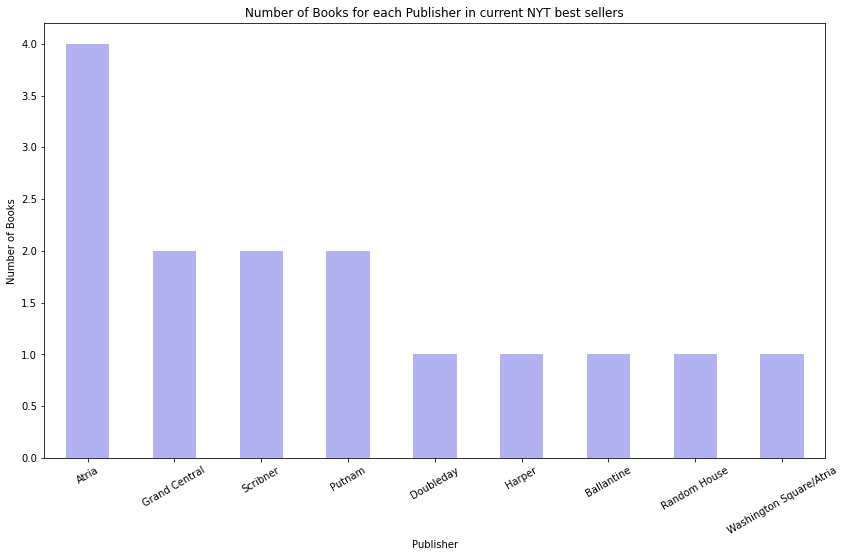

In [46]:
ax = books_nyt['publisher'].value_counts().plot(kind='bar',figsize=(14,8),title="Number of Books for each Publisher in current NYT best sellers", color=(0.5, 0.5, 0.9, 0.6))
plt.xticks(rotation=30)
ax.set_xlabel("Publisher")
ax.set_ylabel("Number of Books")

*Analysis:* <br> We can see that the publisher **Atria** is currently the most represented publisher in this week's NYT best sellers. It is followed by **Grand Central, Scribner and Putnam** with 2 books, whereas all others only have one book in the ranking.

Now, let's take a look at the authors:

Text(0, 0.5, 'Number of Books')

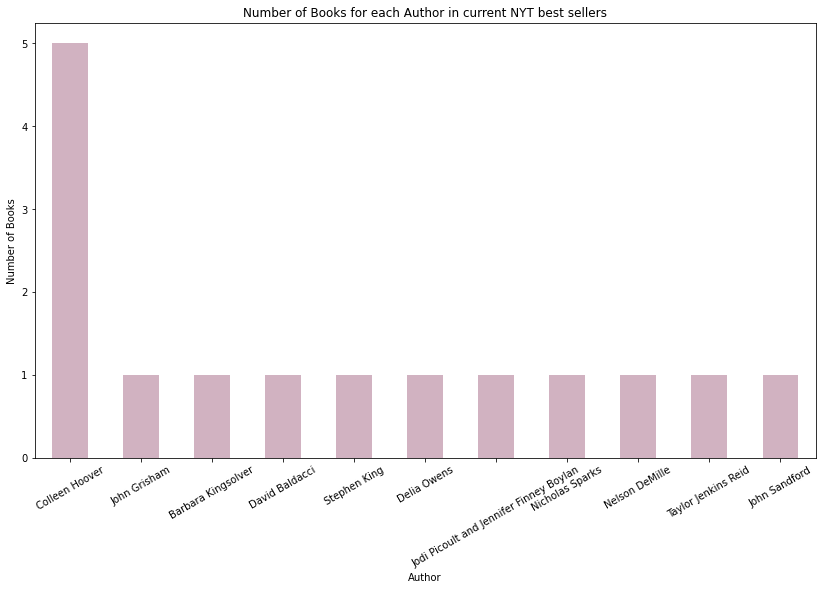

In [47]:
ax = books_nyt['author'].value_counts().plot(kind='bar',figsize=(14,8),title="Number of Books for each Author in current NYT best sellers", color=(0.7, 0.5, 0.6, 0.6))
plt.xticks(rotation=30)
ax.set_xlabel("Author")
ax.set_ylabel("Number of Books")

*Analysis:* <br>It seems like most authors appear only once in the ranking, except for **Colleen Hoover who currently holds 5 books** at the same time in the current NYT best sellers ranking.

Finally, let's create a boxplot to materialize the distribution of the books' numbers of weeks on list:

[Text(0, 0.5, 'Number of Weeks on List'),
 Text(0.5, 1.0, 'NYT Best Sellers Weeks on List')]

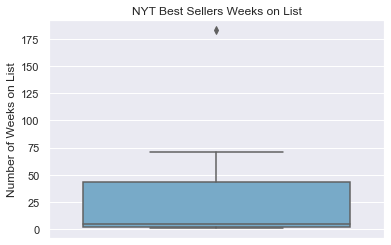

In [48]:
sns.set(style="darkgrid")
sns.boxplot(y=books_nyt["weeks_on_list"], palette="Blues").set(
    ylabel='Number of Weeks on List', title="NYT Best Sellers Weeks on List")

*Analysis:* <br> Thanks to the boxplot, we can see that the **mean is very low**, below 10, and **Q3 is sligthly below 50 weeks on list**. <br>
There is **one maximum outlier value**, above 175 weeks on list, which is the book named "WHERE THE CRAWDADS SING" from Delia Owens.